<img src="python-logo.png" neight="80px"/>

[Python](https://www.python.org) is an open source programming platform that's used by data scientists and data analysts all over the world.  It's free to download and use and Python and it's [90,000+ free packages](https://pypi.python.org/pypi) makes manipulating data a breeze.  It also solves our specific Excel pain points:

- Natively work with higher dimensional objects
- Easily repeat calculations across sheets and workbooks
- Automate common tasks like data manupulation and plotting so handling new data is a breeze.

# BLS Example

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd

matplotlib.rcParams['savefig.dpi'] = 144

def extract_table(df):
    # Use `assert` to check for errors
    assert df.iloc[2,1] == 'CES Industry'
    assert pd.isnull(df.iloc[14,1])
    return df.iloc[3:13,1:]

def extract_header(df):
    return df.iloc[2,1:]

def transform_data(df):
    # Easily squash 2D table into a 1D time series
    df_tmp = (df.set_index(['CES Industry', 'year'])
           .stack()
           .reset_index()
           .rename(columns={2: 'month', 0: 'value'}))

    df_tmp['date'] = pd.to_datetime(df_tmp['year'] + ' ' + df_tmp['month'], errors='coerce')
    return pd.to_numeric(df_tmp.set_index(['CES Industry', 'date'])['value'], errors='coerce').dropna()

def extract_excel(filename):
    # Perform the same calculation for each sheet
    df_dict = pd.read_excel(filename, sheetname=None)
    df = pd.concat((extract_table(df) for df in df_dict.values()))
    df.columns = extract_header(df_dict.values()[0])
    return transform_data(df)

# Perform the same calculation for each workbook
hours =  extract_excel("data/compaewhu.xlsx")
earnings =  extract_excel("data/compaeheu.xlsx")
overtime =  extract_excel("data/compaeotu.xlsx")

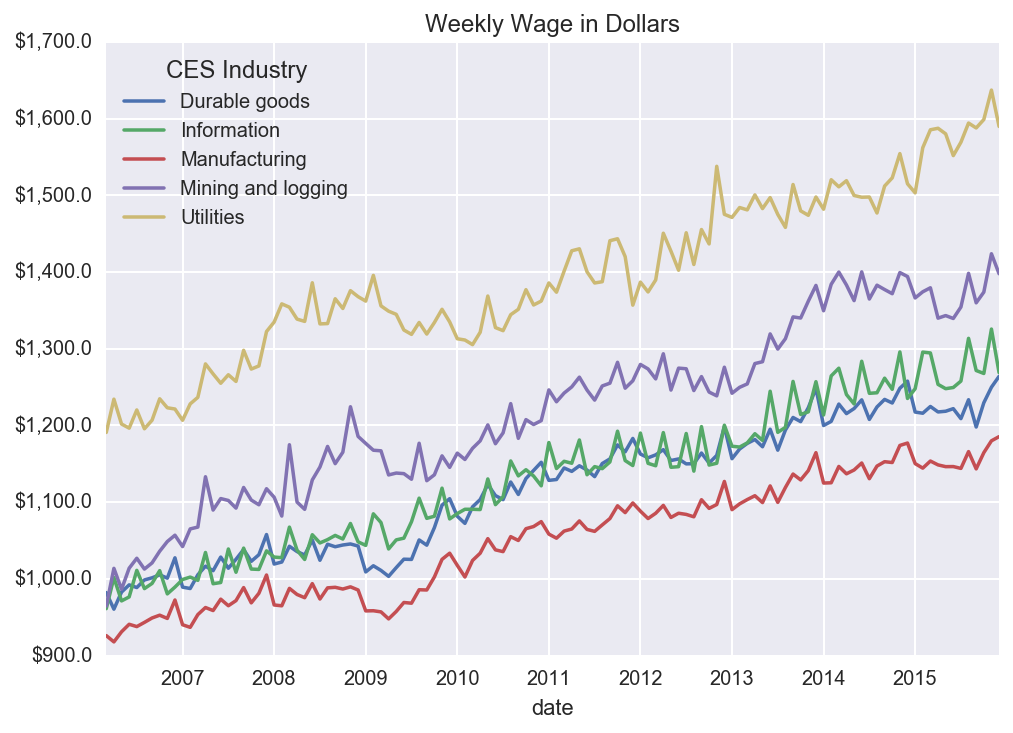

In [2]:
from matplotlib.ticker import FuncFormatter

# Write the formula once, without copying
# Easily handles missing values through `fill_value=0.`
weekly_wage = (hours.add(1.5 * overtime, fill_value=0.) * earnings).reset_index()

highly_paid = [u'Utilities', u'Mining and logging', u'Durable goods', u'Information', u'Manufacturing']

# Plot and format graphs programatically
ax = (weekly_wage[weekly_wage['CES Industry']
        .isin(highly_paid)]
    .set_index(['CES Industry', 'date'])['value']
    .unstack().T
    .plot(title='Weekly Wage in Dollars'))

def dollars(x, _):
    return '${:,}'.format(x)
ax.yaxis.set_major_formatter(FuncFormatter(dollars))

# Calculations Easy to Repeat

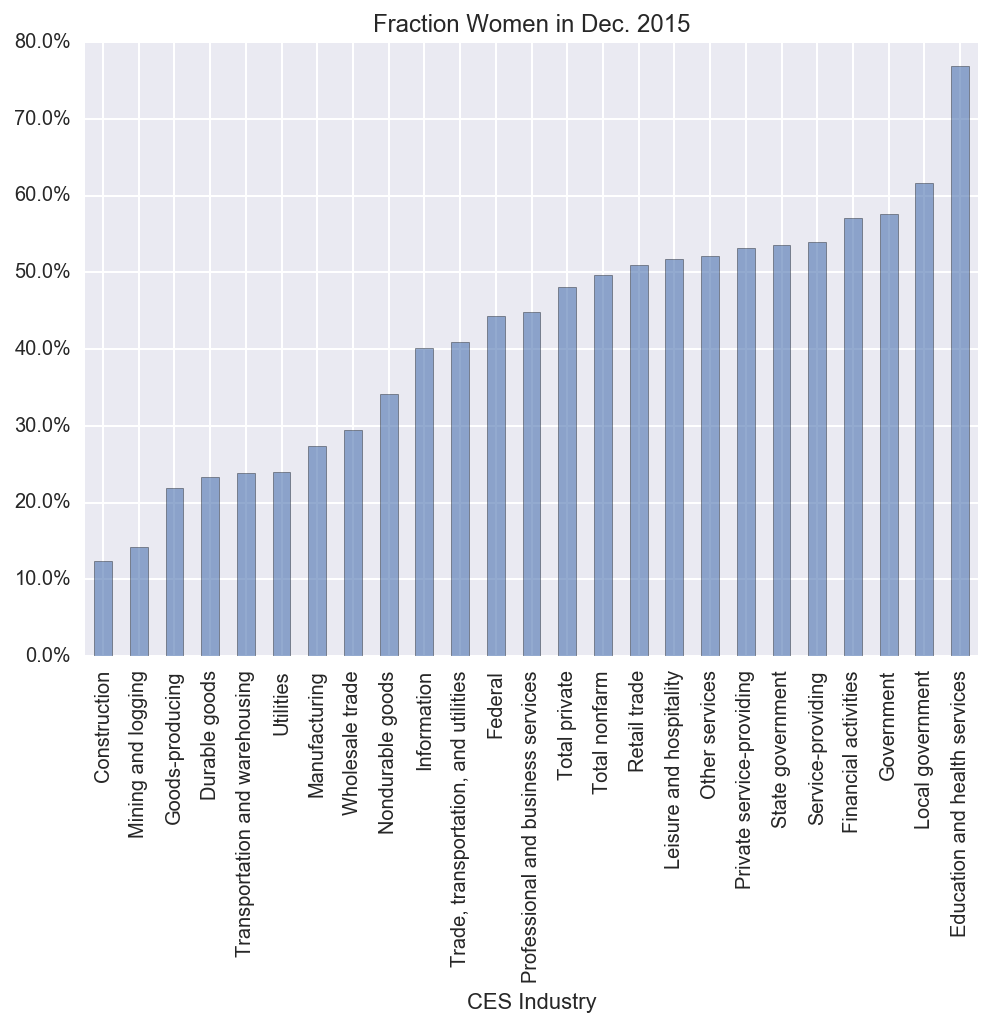

In [3]:
# Easily produce another calculation based on previous code
employees = extract_excel("data/compaeu.xlsx")
women =  extract_excel("data/compwwu.xlsx")

# Formulas are clear and idiomatic
fraction_women = women / employees

# Plot data
ax = (fraction_women[(slice(None), '2015-12-01')]
    .sort_values()
    .plot(kind='bar', alpha=.6, title='Fraction Women in Dec. 2015'))

# Format graphs programatically
def percent(x, _):
    return "{}%".format(x * 100)
ax.yaxis.set_major_formatter(FuncFormatter(percent))

## How hard was this?
This Python code took me 15 minutes to write but can be run on updated data or other data files from BLS.  

## Where to find our code?

You can download this code others for free at [https://github.com/thedataincubator/excel-to-python](https://github.com/thedataincubator/excel-to-python).

## How do I learn to do this myself?
Our Data Science Foundations ([http://www.thedataincubator.com/foundations.html](http://www.thedataincubator.com/foundations.html?utm_source=code&utm_medium=web&utm_campaign=excel_video)) program is geared towards working data analysts with a business background to equip them with the foundational data science skills necessary to move beyond Excel.  The course will focus on

- Automating repetitive manual Excel tasks and programmatically manipulating unstructured and structured data at scale ([https://www.thedataincubator.com/training/module1-a.html](https://www.thedataincubator.com/training/module1-a.html?utm_source=code&utm_medium=web&utm_campaign=excel_video))
- Understanding and performing advanced analytics or machine-learning ([https://www.thedataincubator.com/training/module2-a.html](https://www.thedataincubator.com/training/module2-a.html?utm_source=code&utm_medium=web&utm_campaign=excel_video))

This program distills the foundations of data science into a convenient, eight-week, online, twice-a-week, evening course. The course revolves around hands-on practice manipulating and analyzing data with intensive labs focused on skills directly applicable to your work.  You can sign up at [http://data-science-foundations.eventbrite.com](http://data-science-foundations.eventbrite.com).

## Questions?  Comments?
We'd love to hear from you: [https://www.thedataincubator.com/contact-us.html](https://www.thedataincubator.com/contact-us.html?utm_source=code&utm_medium=web&utm_campaign=excel_video)